In [2]:
! pip install pipreqs

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bb3899e4e3bcf6a91c21a85a656d56b65f804cce73bc6f5a5b6ce45064371443
  Stored in directory: c:\users\karth\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [4]:
! pipreqs "C:\Users\karth\Desktop\ensemble_anomaly_detection\requirements.txt"

Traceback (most recent call last):
  File "C:\Users\karth\anaconda3\envs\deeplearning\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\karth\anaconda3\envs\deeplearning\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\karth\anaconda3\envs\deeplearning\Scripts\pipreqs.exe\__main__.py", line 7, in <module>
  File "C:\Users\karth\anaconda3\envs\deeplearning\lib\site-packages\pipreqs\pipreqs.py", line 488, in main
    init(args)
  File "C:\Users\karth\anaconda3\envs\deeplearning\lib\site-packages\pipreqs\pipreqs.py", line 478, in init
    generate_requirements_file(path, imports, symbol)
  File "C:\Users\karth\anaconda3\envs\deeplearning\lib\site-packages\pipreqs\pipreqs.py", line 157, in generate_requirements_file
    with _open(path, "w") as out_file:
  File "C:\Users\karth\anaconda3\envs\deeplearning\lib\contextlib.py", line 119, in __enter__
    return next(self.gen)
  File "C:\Users\karth\a

In [1]:

import numpy as np
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from utils.load_data import load_data_train, load_data_test, load_data_val
import imageio

# Dataset Analysis

In [ ]:
dataset_directory = r'utils\dataset_files'
df = pd.read_csv(os.path.join(dataset_directory,"Training_DS.csv"))
df.columns= ['Timestamp', 'CAN_ID', 'RTR', 'DLC', 'Data0', 'Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Mean', 'Median',\
              'Skew', 'Kurtosis', 'Variance', 'Standard_deviation','Label','Anomaly_Label']

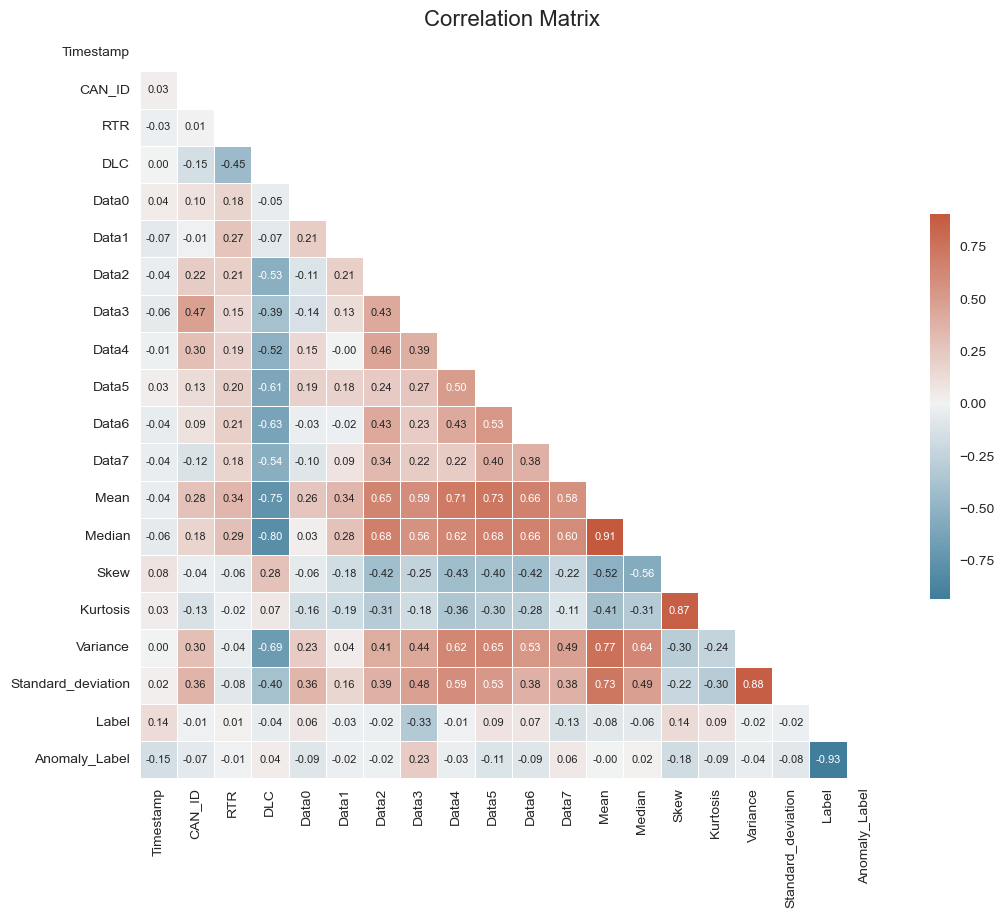

In [16]:


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax, annot_kws={"fontsize":8, "ha": 'center', 'va': 'center'})

plt.title("Correlation Matrix", fontsize=16)

plt.show()


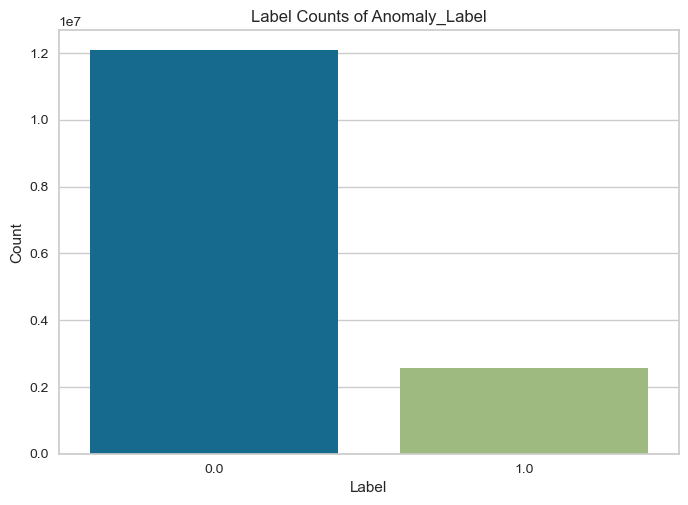

In [4]:


# count the number of labels in 'Anomaly_Label' column
label_counts = df['Anomaly_Label'].value_counts()

# create a bar plot
sns.barplot(x=label_counts.index, y=label_counts.values)

# set the plot title and labels
plt.title('Label Counts of Anomaly_Label')
plt.xlabel('Label')
plt.ylabel('Count')

# display the plot
plt.show()


# Visualization of data0- data7 from the test dataset

In [3]:
# plotting the varaibkles from the test dataset:
dataset_directory = r'utils\dataset_files'
df = pd.read_csv(os.path.join(dataset_directory,"Test_DS.csv"))
df.columns= ['Timestamp', 'CAN_ID', 'RTR', 'DLC', 'Data0', 'Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Label','Anomaly_Label',\
'Mean', 'Median','Skew', 'Kurtosis', 'Variance', 'Standard_deviation']

In [4]:
df = df.sort_values(by=["Timestamp"])

In [ ]:
df = df[:100]

Text(0, 0.5, 'Data7')

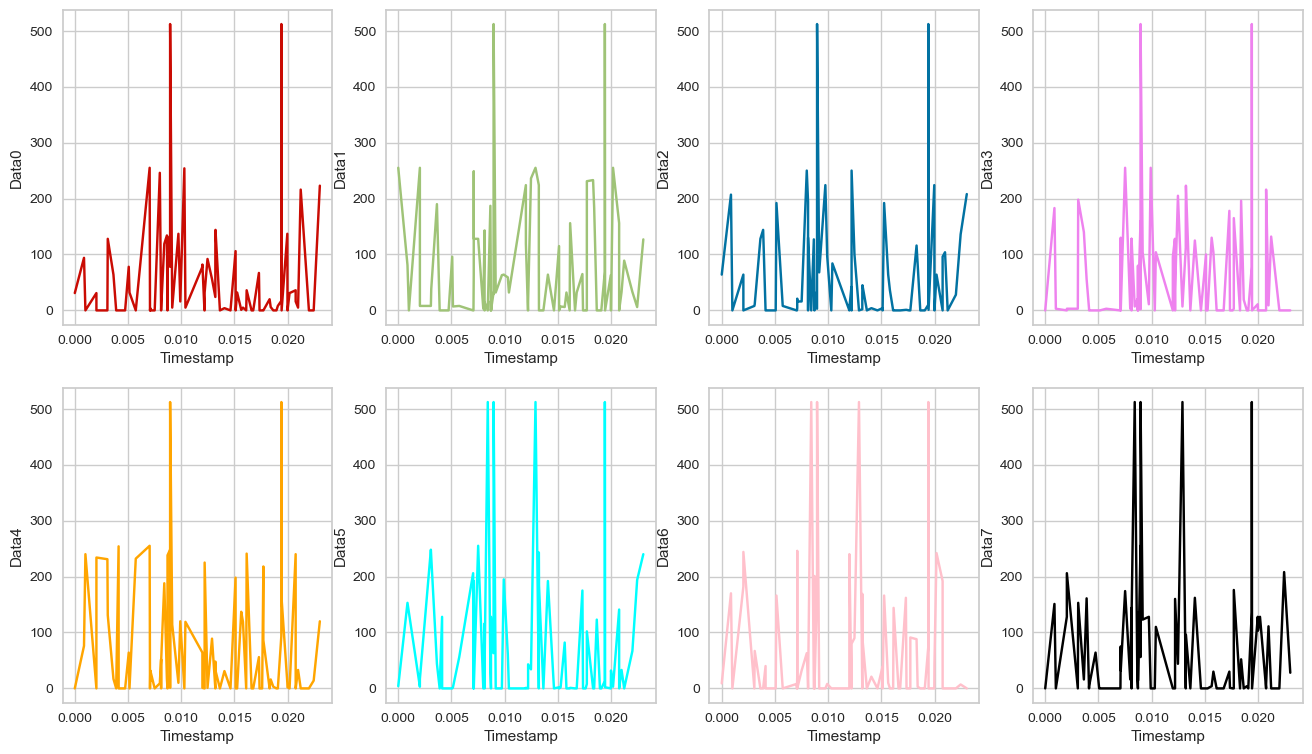

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(16,9))

ax[0][0].plot(df.Timestamp,df.Data0,c='r')
ax[0][0].set_xlabel('Timestamp')
ax[0][0].set_ylabel('Data0')

ax[0][1].plot(df.Timestamp,df.Data1, c='g')
ax[0][1].set_xlabel('Timestamp')
ax[0][1].set_ylabel('Data1')

ax[0][2].plot(df.Timestamp,df.Data2, c='b')
ax[0][2].set_xlabel('Timestamp')
ax[0][2].set_ylabel('Data2')

ax[0][3].plot(df.Timestamp,df.Data3, c='violet')
ax[0][3].set_xlabel('Timestamp')
ax[0][3].set_ylabel('Data3')

ax[1][0].plot(df.Timestamp,df.Data4, c='orange')
ax[1][0].set_xlabel('Timestamp')
ax[1][0].set_ylabel('Data4')

ax[1][1].plot(df.Timestamp,df.Data5, c ='cyan')
ax[1][1].set_xlabel('Timestamp')
ax[1][1].set_ylabel('Data5')

ax[1][2].plot(df.Timestamp,df.Data6, c= 'pink')
ax[1][2].set_xlabel('Timestamp')
ax[1][2].set_ylabel('Data6')

ax[1][3].plot(df.Timestamp,df.Data7, c= 'black')
ax[1][3].set_xlabel('Timestamp')
ax[1][3].set_ylabel('Data7')

# Using the dataframe to visualize the transparency of attacks from the features

In [202]:
dataset_directory = r'utils\dataset_files'
tst_df = pd.read_csv(os.path.join(dataset_directory,"Test_DS.csv"))
tst_df.columns= ['Timestamp', 'CAN_ID', 'RTR', 'DLC', 'Data0', 'Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Label','Anomaly_Label',\
        'Mean', 'Median','Skew', 'Kurtosis', 'Variance', 'Standard_deviation']

In [203]:
new_df = tst_df.drop(['Mean','Median','Skew', 'Kurtosis', 'Variance', 'Standard_deviation'], axis=1)

In [205]:
df_subset = new_df.sample(n=500, random_state=42)


# DoS attack with CAN_ID 0x00

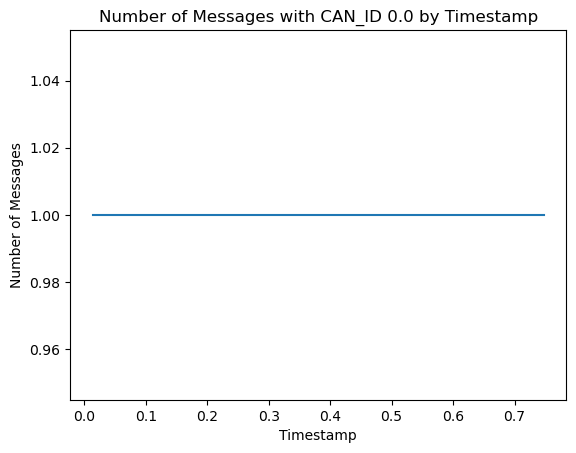

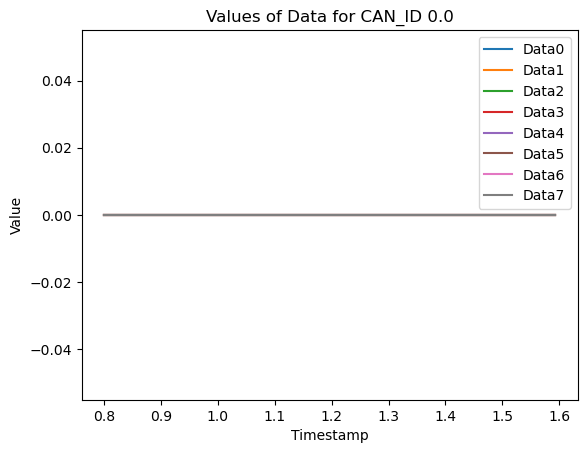

In [134]:

# Filter the data to only include messages with the chosen CAN_ID
can_id = 0.0
can_id_data = new_df[new_df["CAN_ID"] == can_id]

# Group the data by timestamp and count the number of messages for each timestamp
timestamp_counts = can_id_data.groupby("Timestamp")["CAN_ID"].count().head(100)

# Plot the number of messages for each timestamp
sns.lineplot(data=timestamp_counts)
plt.title("Number of Messages with CAN_ID {} by Timestamp".format(can_id))
plt.xlabel("Timestamp")
plt.ylabel("Number of Messages")
plt.show()

# Plot the values of Data0 through Data7 for each timestamp
for i in range(8):
    plt.plot(can_id_data["Timestamp"].head(100), can_id_data["Data{}".format(i)].head(100), label="Data{}".format(i))
plt.title("Values of Data for CAN_ID {}".format(can_id))
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.show()

# Create a moving plot in GIF format to visualize spikes/attacks
images = []
for i in range(len(timestamp_counts)):
    # Filter the data to only include messages before the current timestamp
    current_timestamp = timestamp_counts.index[i]
    current_data = can_id_data[can_id_data["Timestamp"] <= current_timestamp]
    
    # Group the data by timestamp and count the number of messages for each timestamp
    current_counts = current_data.groupby("Timestamp")["CAN_ID"].count()
    
    # Plot the number of messages for each timestamp
    sns.lineplot(data=current_counts)
    plt.title("DoS Attack with CAN_ID OxOO")
    plt.xlabel("Timestamp")
    plt.ylabel("Number of Messages")
    
    # Save the plot as an image
    filename = "plot_{:03d}.png".format(i)
    plt.savefig(filename)
    plt.close()
    
    # Add the image to the list of images
    images.append(imageio.imread(filename))

# Create the GIF from the list of images
imageio.mimsave("moving_plot.gif", images)


# Fuzzy Attack by analysing the frequency of messages

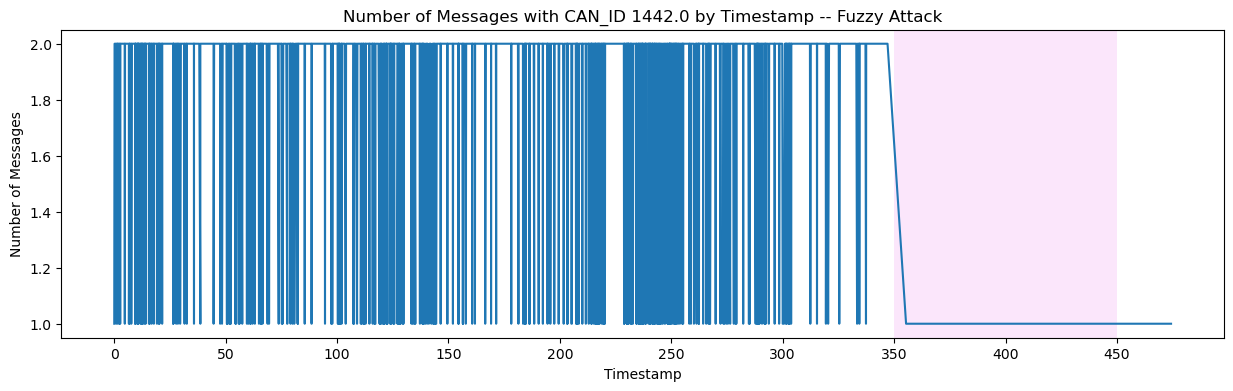

In [212]:


# Group the data by CAN_ID and Timestamp and count the number of messages for each group
grouped = new_df.groupby(["CAN_ID", "Timestamp"]).count()

# Get the unique CAN_IDs in the data
can_ids = [1442.0]

# Loop through each CAN_ID and plot the number of messages for each timestamp
for can_id in can_ids:
    can_id_data = grouped.loc[can_id]
    timestamp_counts = can_id_data["RTR"]
    
    # Create a time series plot of the number of messages over time
    plt.figure(figsize=(15, 4))
    plt.plot(timestamp_counts.index, timestamp_counts.values)
    plt.xticks(range(0,451,50))
    plt.axvspan(350, 450, facecolor='violet', alpha=0.2)
    

    # Set the plot title and labels
    plt.title("Number of Messages with CAN_ID {} by Timestamp -- Fuzzy Attack".format(can_id))
    plt.xlabel("Timestamp")
    plt.ylabel("Number of Messages")
    
    # Display the plot
    plt.show()


#  Detection of Spoofing Attacks with Moving Average and Standard Deviation

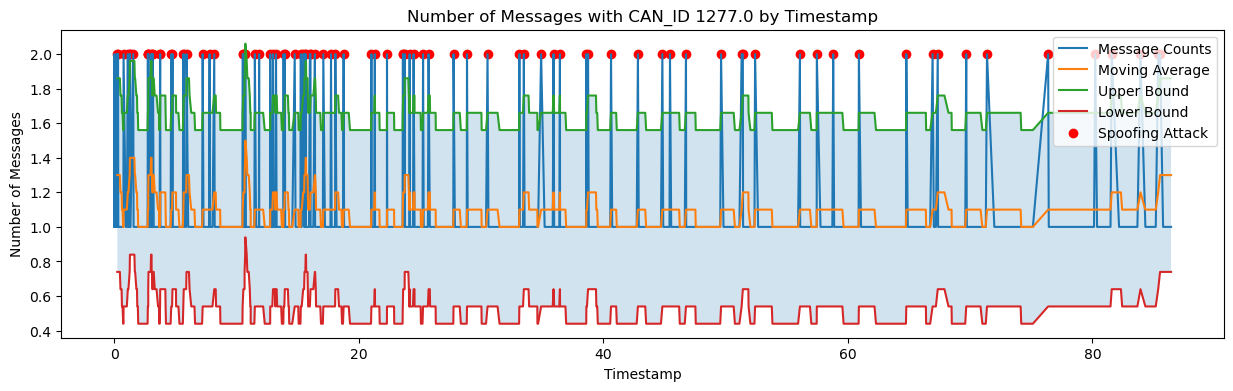

In [213]:

# Filter the data for only the CAN_ID of interest
can_id = 1277.0
new_df = new_df[new_df["CAN_ID"] == can_id]

# Group the data by Timestamp and count the number of messages for each timestamp
grouped = new_df.groupby("Timestamp").count()

# Calculate the moving average of the message counts
ma_window = 10
ma = grouped["RTR"].rolling(window=ma_window).mean()

# Find the standard deviation of the message counts
std_dev = grouped["RTR"].std()

# Calculate the upper and lower bounds for identifying anomalies
upper_bound = ma + 2 * std_dev
lower_bound = ma - 2 * std_dev

# Plot the number of messages for each timestamp, with the moving average and bounds overlaid
plt.figure(figsize=(15, 4))
plt.plot(grouped.index, grouped["RTR"].values, label="Message Counts")
plt.plot(ma.index, ma.values, label="Moving Average")
plt.plot(upper_bound.index, upper_bound.values, label="Upper Bound")
plt.plot(lower_bound.index, lower_bound.values, label="Lower Bound")

# Shade the regions between the upper and lower bounds
plt.fill_between(ma.index, upper_bound, lower_bound, alpha=0.2)

# Set the plot title and labels
plt.title("Number of Messages with CAN_ID {} by Timestamp".format(can_id))
plt.xlabel("Timestamp")
plt.ylabel("Number of Messages")


# Identify and highlight potential spoofing attacks based on the upper and lower bounds
potential_attacks = grouped["RTR"][(grouped["RTR"] > upper_bound) | (grouped["RTR"] < lower_bound)]
if not potential_attacks.empty:
    plt.scatter(potential_attacks.index, potential_attacks.values, color="red", label="Spoofing Attack")
    
plt.legend()
# Display the plot
plt.show()


# Visualization of attacks from data0-data7 feature

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio

# Select the data columns
data_columns = ['Data0', 'Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7']

# Plot the message data bytes over time and save each plot as an image file
with imageio.get_writer('can_message.gif', mode='I',duration=0.5) as writer:
    durations = [100] * len(df_subset)
    for i in range(len(df_subset)):
        fig, ax = plt.subplots(figsize=(10,6))
        df_subset.iloc[i] [data_columns].plot(ax=ax, color=['blue'])
        ax.set_xlabel('Time') 
        ax.set_ylabel('Data Byte Value')
        ax.set_title('CAN Message Data Bytes over Time')
        plt.savefig('can_message_{}.png'.format(i))
        plt.close()
        writer.append_data(imageio.imread('can_message_{}.png'.format(i)))


# Normal Data

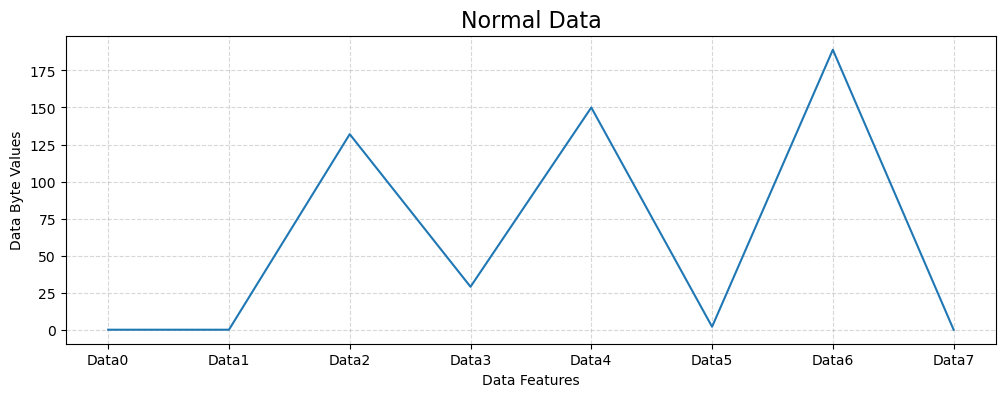

In [127]:

# Get the feature column names
feature_columns = df_subset.columns[4:12]

# Get the feature values for the selected row
feature_values = df_subset.iloc[497, 4:12].values.flatten()

# Plot the feature values
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(feature_columns, feature_values)
ax.set_xlabel('Data Features')
ax.set_ylabel('Data Byte Values')
ax.set_title('Normal Data', fontsize=16)


ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Continuous Change Attack

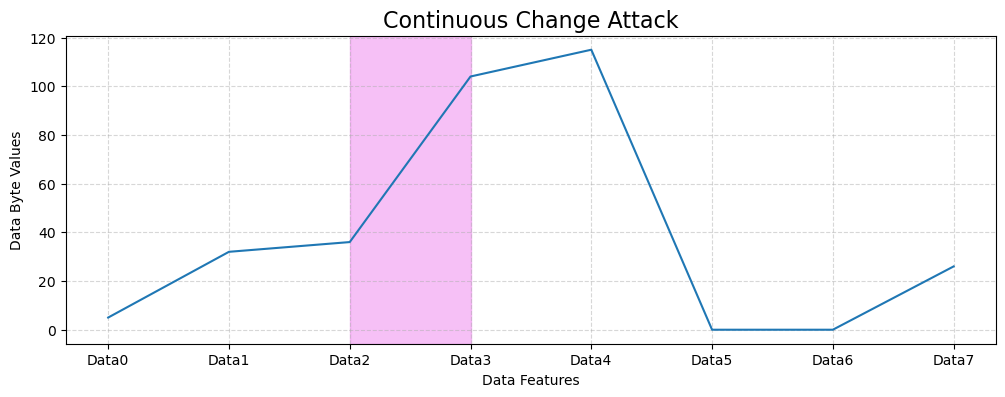

In [124]:

# Get the feature column names
feature_columns = df_subset.columns[4:12]

# Get the feature values for the selected row
feature_values = df_subset.iloc[496, 4:12].values.flatten()

# Plot the feature values
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(feature_columns, feature_values)
ax.set_xlabel('Data Features')
ax.set_ylabel('Data Byte Values')
ax.set_title('Continuous Change Attack', fontsize=16)

# Highlight the area between data2 and data3
ax.axvspan('Data2', 'Data3', alpha=0.5, color='violet')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Replay Attack

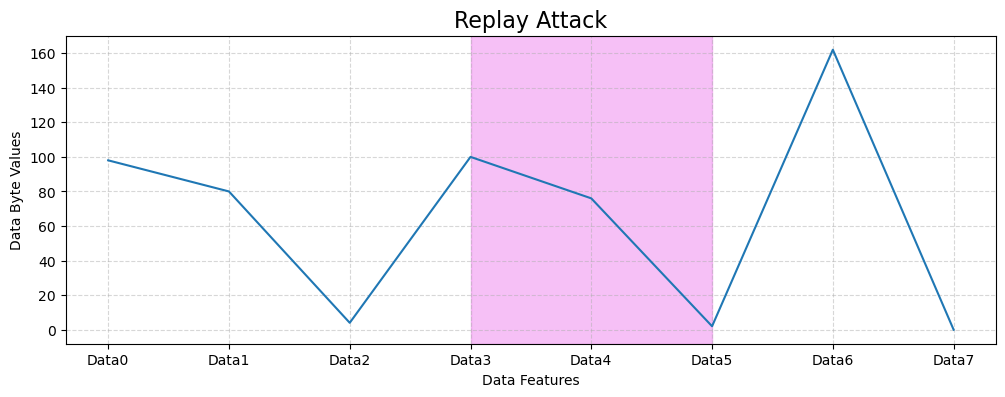

In [216]:

# Get the feature column names
feature_columns = df_subset.columns[4:12]

# Get the feature values for the selected row
feature_values = df_subset.iloc[391, 4:12].values.flatten()

# Plot the feature values
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(feature_columns, feature_values)
ax.set_xlabel('Data Features')
ax.set_ylabel('Data Byte Values')
ax.set_title('Replay Attack', fontsize=16)

# Highlight the area between data2 and data3
ax.axvspan('Data3', 'Data5', alpha=0.5, color='violet')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Plateau Attack

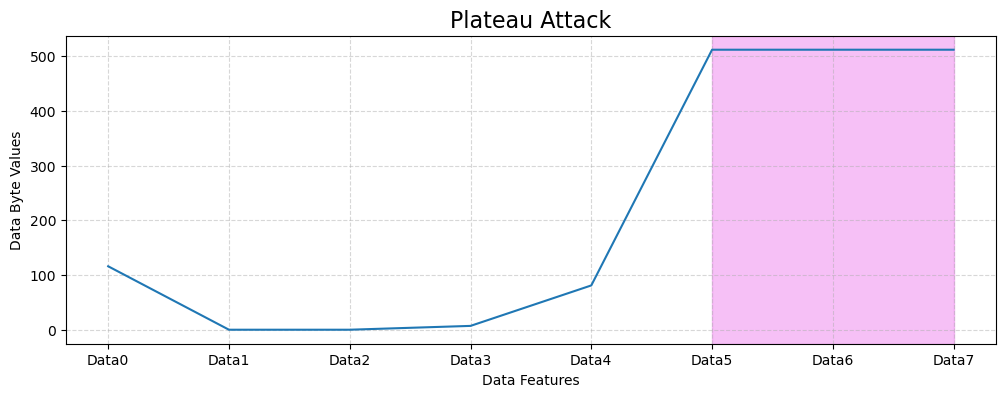

In [132]:

# Get the feature column names
feature_columns = df_subset.columns[4:12]

# Get the feature values for the selected row
feature_values = df_subset.iloc[77, 4:12].values.flatten()

# Plot the feature values
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(feature_columns, feature_values)
ax.set_xlabel('Data Features')
ax.set_ylabel('Data Byte Values')
ax.set_title('Plateau Attack', fontsize=16)


ax.grid(True, linestyle='--', alpha=0.5)
ax.axvspan('Data5', 'Data7', alpha=0.5, color='violet')

plt.show()

# Visualizing the dynamic plot for binary prediction of the test dataset

In [37]:
X_train,y_train = load_data_train()

In [38]:
X_test,y_test =load_data_test()

In [39]:
X_val,y_val = load_data_val()

In [67]:
r100 = 1000
subset = np.random.choice(y_test, size=r100)

In [ ]:

# Define the window size
window_size = 100

# Create the initial plot
fig, ax = plt.subplots()
line, = ax.plot(subset[:window_size],color='red')

# Initialize the GIF writer
with imageio.get_writer('test_ensemble.gif', mode='I') as writer:
    # Update the plot for each new data point
    for i in range(window_size, len(subset)):
        line.set_ydata(subset[i-window_size:i])
        ax.set_ylim([subset[i-window_size:i].min(), subset[i-window_size:i].max()])
        plt.draw()
        plt.pause(1)  # Increase the pause time to slow down the animation

        # Add the current plot to the GIF
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        writer.append_data(image)


# Splitting the training data into several subsets

In [59]:
import numpy as np

def balanced_subset(data, target, subset_size):
    unique_labels, counts = np.unique(target, return_counts=True)
    min_count = min(counts)
    subset_size = min(min_count * len(unique_labels), subset_size)
    
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    target = target[indices]
    
    data_subset = []
    target_subset = []
    for label in unique_labels:
        label_indices = np.where(target == label)[0]
        label_indices = label_indices[:subset_size // len(unique_labels)]
        data_label = data[label_indices]
        target_label = target[label_indices]
        data_subset.append(data_label)
        target_subset.append(target_label)
    
    data_subset = np.concatenate(data_subset)
    target_subset = np.concatenate(target_subset)
    
    return data_subset,target_subset,unique_labels


In [96]:
X_train,y_train, _ = balanced_subset(X_train, y_train, subset_size=1032471)

# Training the base models on five different subsets

In [ ]:
# list of models to be trained
models = [SGDClassifier(loss='log'),GaussianNB(), RandomForestClassifier(), DecisionTreeClassifier(), AdaBoostClassifier(), XGBClassifier(), CatBoostClassifier(task_type='GPU',iterations=8,silent=True), LGBMClassifier(verbose_eval=-1),GradientBoostingClassifier()]

# number of subsets to create
num_subsets = 5

# size of each subset
subset_size = 1032471

# list to store trained models
trained_models = []

for i in range(num_subsets):
    data_subset, target_subset, labels = balanced_subset(X_train, y_train, subset_size)
    for j, model in enumerate(models):
        model_name = type(model).__name__
        model.fit(data_subset, target_subset)
        filename = f"{model_name} - Subset {i}.joblib"
        joblib.dump(model, filename)
        trained_models.append((i, j, model))

